In [1]:
!apt-get update
!apt-get install -y libprotobuf-dev libleveldb-dev libsnappy-dev libopencv-dev libhdf5-serial-dev protobuf-compiler
!apt-get install -y --no-install-recommends libboost-all-dev
!apt-get install -y libatlas-base-dev libgflags-dev libgoogle-glog-dev liblmdb-dev
!apt-get install -y python3-dev


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,424 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,108 kB]
Get:13 https://r2u.stat.illinois.edu/ubunt

In [2]:
!pip install torch torchvision


**Creating Custom Dataset Class**

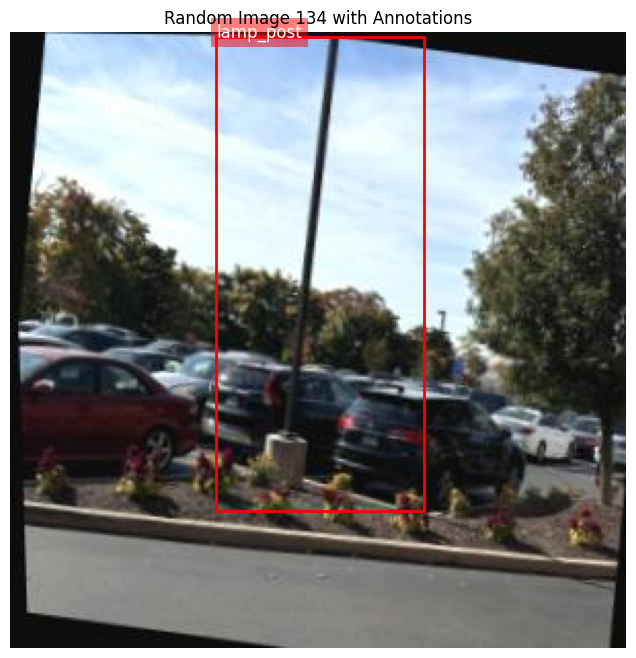

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import zipfile
import xml.etree.ElementTree as ET

zip_file_path = '/content/OBJECT_DETECTION_FINAL_DATASET.v16-dataset.voc.zip'
extracted_path = '/content/OBJECT_DETECTION_FINAL_DATASET'

if not os.path.exists(extracted_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_path)

dataset_path = os.path.join(extracted_path, 'train')

image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png'))]

label_map = {
    1: "car",
    2: "chair",
    3: "lamp_post",
    0: "Background"
}

def load_image_and_boxes(image_path):
    image = Image.open(image_path).convert("RGB")
    annotation_path = image_path.replace('.jpg', '.xml').replace('.png', '.xml')

    boxes = []
    labels = []

    tree = ET.parse(annotation_path)
    root = tree.getroot()

    # Looping through each object in the annotation
    for obj in root.findall('object'):
        # Getting the label (object name) and map it to an integer label using `label_map`
        label = obj.find('name').text
        label_id = next((key for key, value in label_map.items() if value == label), 0)

        # Getting the bounding box coordinates
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)

        boxes.append([xmin, ymin, xmax, ymax])
        labels.append(label_id)

    boxes_np = np.array(boxes)
    labels_np = np.array(labels)

    return image, {'boxes': boxes_np, 'labels': labels_np}


#  displaying a random image from the dataset
if image_files:
    image_index = random.randint(0, len(image_files) - 1)
    selected_image_path = os.path.join(dataset_path, image_files[image_index])

    # Loading the selected image and its annotations
    image, boxes = load_image_and_boxes(selected_image_path)
    image_array = np.array(image)

    # Displaying the image and annotations
    plt.figure(figsize=(10, 8))
    plt.imshow(image_array)

    boxes_np = boxes['boxes']
    labels = boxes['labels']

    for i, box in enumerate(boxes_np):
        xmin, ymin, xmax, ymax = box
        plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                          linewidth=2, edgecolor='red', facecolor='none'))
        class_name = label_map.get(labels[i], "Unknown")
        plt.text(xmin, ymin, class_name, color='white', fontsize=12,
                 bbox=dict(facecolor='red', alpha=0.5, edgecolor='none'))

    plt.title(f'Random Image {image_index} with Annotations')
    plt.axis('off')
    plt.show()
else:
    print("No images found in the dataset directory.")




**Partition Dataset**

In [4]:
import zipfile
import os

with zipfile.ZipFile("/content/OBJECT_DETECTION_FINAL_DATASET.v16-dataset.voc.zip", "r") as zip_ref:
    zip_ref.extractall("/content/dataset")


In [5]:
import os

for root, dirs, files in os.walk("/content/dataset"):
    for name in files:
        print(os.path.join(root, name))


/content/dataset/README.roboflow.txt
/content/dataset/README.dataset.txt
/content/dataset/test/car_61_jpeg.rf.4fe9da98bba201b6de17a0b974ac12c5.jpg
/content/dataset/test/lamp_post_43_jpeg.rf.9fe9fca473ce625d0be8eeaacbad5eb5.jpg
/content/dataset/test/Chair_14_jpg.rf.18aa1c65dd5616f8311e6988fc134b1b.xml
/content/dataset/test/lamp_post_26_jpeg.rf.4f23ada4c89baf8c10261c59708aa624.xml
/content/dataset/test/Chair_47_jpg.rf.38af9a451cff30a2634556e9736a6840.xml
/content/dataset/test/lamp_post_10_jpeg.rf.ef922b3191dcdee709dcb88858be8443.jpg
/content/dataset/test/car_39_jpeg.rf.58fde8350c865642701a058e2fb486e1.xml
/content/dataset/test/car_30_jpeg.rf.9037b7eab1aa5733f380d6d88038512b.jpg
/content/dataset/test/Chair_11_jpg.rf.2a5c5b35096ef72ef253ac28cde1d2f4.jpg
/content/dataset/test/Chair_44_jpg.rf.d0fe33b5233087d6777de4c03217b47f.jpg
/content/dataset/test/car_60_jpeg.rf.34e054382adf07fca6c9ec4a9425e3f2.xml
/content/dataset/test/car_57_jpeg.rf.b406edec850b49908d2d554858a30988.xml
/content/dataset/

In [6]:
import os

dataset_dir = "/content/dataset/"
files = os.listdir(dataset_dir)
print(files)


['test', 'train', 'valid', 'README.roboflow.txt', 'README.dataset.txt']


In [7]:
import glob


image_files = glob.glob(os.path.join(dataset_dir, '**/*.jpg'), recursive=True)
annotation_files = glob.glob(os.path.join(dataset_dir, '**/*.xml'), recursive=True)

print(f"Found {len(image_files)} images: {image_files[:5]}")
print(f"Found {len(annotation_files)} annotation files: {annotation_files[:5]}")


Found 472 images: ['/content/dataset/test/car_61_jpeg.rf.4fe9da98bba201b6de17a0b974ac12c5.jpg', '/content/dataset/test/lamp_post_43_jpeg.rf.9fe9fca473ce625d0be8eeaacbad5eb5.jpg', '/content/dataset/test/lamp_post_10_jpeg.rf.ef922b3191dcdee709dcb88858be8443.jpg', '/content/dataset/test/car_30_jpeg.rf.9037b7eab1aa5733f380d6d88038512b.jpg', '/content/dataset/test/Chair_11_jpg.rf.2a5c5b35096ef72ef253ac28cde1d2f4.jpg']
Found 472 annotation files: ['/content/dataset/test/Chair_14_jpg.rf.18aa1c65dd5616f8311e6988fc134b1b.xml', '/content/dataset/test/lamp_post_26_jpeg.rf.4f23ada4c89baf8c10261c59708aa624.xml', '/content/dataset/test/Chair_47_jpg.rf.38af9a451cff30a2634556e9736a6840.xml', '/content/dataset/test/car_39_jpeg.rf.58fde8350c865642701a058e2fb486e1.xml', '/content/dataset/test/car_60_jpeg.rf.34e054382adf07fca6c9ec4a9425e3f2.xml']


**Normalization and Data Agumentation**

In [8]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import xml.etree.ElementTree as ET

# Custom Dataset class for loading images and annotations
class CustomDataset(Dataset):
    def __init__(self, images, label_map, transforms=None):
        self.images = images
        self.transforms = transforms
        self.label_map = label_map

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # Loading image
        img_path = self.images[idx]
        image = Image.open(img_path).convert("RGB")

        # Constructing the annotation file path
        annotation_path = img_path.replace('.jpg', '.xml').replace('.png', '.xml')

        # Parsing the annotation file
        boxes = []
        labels = []

        if os.path.exists(annotation_path):
            tree = ET.parse(annotation_path)
            root = tree.getroot()

            for obj in root.findall('object'):
                label = obj.find('name').text
                label_id = next((key for key, value in self.label_map.items() if value == label), 0)  # Default to 0 if not found

                bndbox = obj.find('bndbox')
                xmin = int(bndbox.find('xmin').text)
                ymin = int(bndbox.find('ymin').text)
                xmax = int(bndbox.find('xmax').text)
                ymax = int(bndbox.find('ymax').text)

                boxes.append([xmin, ymin, xmax, ymax])
                labels.append(label_id)

        # Convert boxes and labels to tensors
        target = {
            'boxes': torch.tensor(boxes, dtype=torch.float32),
            'labels': torch.tensor(labels, dtype=torch.int64)
        }

        if self.transforms:
            image = self.transforms(image)

        return image, target

# Defining transformations
data_transforms = transforms.Compose([
    transforms.Resize((300, 300)),  # Resize to SSD input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Applying SSD300 specific normalization
])
dataset_path = '/content/OBJECT_DETECTION_FINAL_DATASET/train'

image_files = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png'))]

label_map = {
    1: "car",
    2: "chair",
    3: "lamp_post",
    0: "Background"
}

# Creating the custom dataset
dataset = CustomDataset(images=image_files, label_map=label_map, transforms=data_transforms)

# Setting batch size to 8 as per requirement
data_loader = DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))

# Checking the size of one batch
for images, targets in data_loader:
    print(f"Batch size: {len(images)}")
    print(f"Targets: {targets}")
    break


Batch size: 8
Targets: ({'boxes': tensor([[140.,   1., 188., 243.]]), 'labels': tensor([3])}, {'boxes': tensor([[196.,   1., 293., 251.],
        [ 74., 106., 117., 232.]]), 'labels': tensor([3, 3])}, {'boxes': tensor([[106.,   7., 208., 301.]]), 'labels': tensor([3])}, {'boxes': tensor([[ 25.,  70., 281., 300.],
        [  5.,  91.,  45., 150.],
        [ 37.,  94.,  71., 147.],
        [ 60.,  94.,  99., 151.]]), 'labels': tensor([1, 1, 1, 1])}, {'boxes': tensor([[115.,   1., 170., 301.]]), 'labels': tensor([3])}, {'boxes': tensor([[ 62.,  23., 246., 209.]]), 'labels': tensor([1])}, {'boxes': tensor([[ 12.,  44., 276., 300.],
        [252., 107., 298., 179.],
        [226.,  94., 269., 152.]]), 'labels': tensor([1, 1, 1])}, {'boxes': tensor([[119.,  51., 175., 221.]]), 'labels': tensor([3])})


**Replace the Last Layer**

In [20]:
import torch
import torchvision
from torchvision.models.detection import ssd300_vgg16

# Load the pre-trained SSD model
model = ssd300_vgg16(pretrained=True)
model.eval()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [40]:
import torch
from torchvision.models.detection import ssdlite320_mobilenet_v3_large
from torch import nn

# Loading a pre-trained SSD model
model = ssdlite320_mobilenet_v3_large(pretrained=True)

num_classes = 4  # 3 classes + 1 background class

classification_head = model.head.classification_head
print(classification_head)

last_conv_layer = classification_head.module_list[-1][1]

# Get the input channels for the final layer
in_channels = last_conv_layer.in_channels
num_anchors = 6
out_channels = num_classes * num_anchors

# Replacing the last layer with a new Conv2d layer
classification_head.module_list[-1][1] = nn.Conv2d(in_channels, out_channels, kernel_size=1)

print(model.head.classification_head)

SSDLiteClassificationHead(
  (module_list): ModuleList(
    (0): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(672, 672, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=672, bias=False)
        (1): BatchNorm2d(672, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): Conv2d(672, 546, kernel_size=(1, 1), stride=(1, 1))
    )
    (1): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(480, 480, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=480, bias=False)
        (1): BatchNorm2d(480, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): Conv2d(480, 546, kernel_size=(1, 1), stride=(1, 1))
    )
    (2): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=512, bias=False)
        (1): BatchNorm2d(512, eps=0.001, momentum=0.03, a

**Evaluate Performance for Training and Validation Data**

In [11]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
import torchvision
from torchvision.models.detection import ssd300_vgg16
import torch.nn as nn

subset_size = 50
dataset_subset = Subset(dataset, range(subset_size))
data_loader = DataLoader(dataset_subset, batch_size=1, shuffle=True, num_workers=1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initializing the SSD 300 model (VGG16 backbone)
model = ssd300_vgg16(pretrained=True)

# Updating label map to include background
label_map = {
    "background": 0,
    "car": 1,
    "chair": 2,
    "lamp_post": 3
}
num_classes = len(label_map)

for name, module in model.head.classification_head.named_children():
    if isinstance(module, nn.Conv2d):
        in_channels = module.in_channels
        num_defaults = module.out_channels // 81  # pretrained model has 81 classes originally
        out_channels = num_classes * num_defaults
        setattr(model.head.classification_head, name, nn.Conv2d(in_channels, out_channels, kernel_size=module.kernel_size, padding=module.padding))

model.to(device)

num_epochs = 1

# Forward Pass Loop (No backpropagation or optimization)
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for batch_idx, (images, targets) in enumerate(data_loader):
        if batch_idx >= 10:
            break

        images = [image.to(device) for image in images]


        if isinstance(targets, dict):
            targets = [{k: v.to(device) for k, v in targets.items()}]
        elif isinstance(targets, list) and all(isinstance(t, dict) for t in targets):
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        for target in targets:
            if 'boxes' in target and target['boxes'].ndim == 3:
                target['boxes'] = target['boxes'].squeeze(0)

            if 'labels' in target:
                target['labels'] = target['labels'].view(-1)

            target['labels'] = torch.clamp(target['labels'], min=0, max=num_classes - 1)

        # Forward pass with mixed precision
        try:
            with torch.amp.autocast(device_type='cuda'):
                loss_dict = model(images, targets)
                losses = sum(loss for loss in loss_dict.values())

            running_loss += losses.item()
        except IndexError as e:
            print(f"IndexError occurred: {e}")
            print(f"Targets: {targets}")
            continue

    # Average Training Loss for the limited number of batches
    train_loss = running_loss / (batch_idx + 1)
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Training Loss: {train_loss}")

# Defining the compute_iou function before using it in evaluation
def compute_iou(pred_box, target_box):
    inter_xmin = max(pred_box[0], target_box[0])
    inter_ymin = max(pred_box[1], target_box[1])
    inter_xmax = min(pred_box[2], target_box[2])
    inter_ymax = min(pred_box[3], target_box[3])

    inter_area = max(0, inter_xmax - inter_xmin) * max(0, inter_ymax - inter_ymin)

    pred_area = (pred_box[2] - pred_box[0]) * (pred_box[3] - pred_box[1])
    target_area = (target_box[2] - target_box[0]) * (target_box[3] - target_box[1])

    union_area = pred_area + target_area - inter_area

    iou = inter_area / union_area if union_area > 0 else 0
    return iou

# Evaluation Loop (Only running once after all training)
model.eval()  # Setting model to evaluation mode
all_ious = []
with torch.no_grad():
    for batch_idx, (images, targets) in enumerate(data_loader):
        if batch_idx >= 10:
            break

        images = [image.to(device) for image in images]

        if isinstance(targets, dict):
            targets = [{k: v.to(device) for k, v in targets.items()}]
        elif isinstance(targets, list) and all(isinstance(t, dict) for t in targets):
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        for target in targets:
            if 'boxes' in target and target['boxes'].ndim == 3:
                target['boxes'] = target['boxes'].squeeze(0)

            if 'labels' in target:
                target['labels'] = target['labels'].view(-1)

            target['labels'] = torch.clamp(target['labels'], min=0, max=num_classes - 1)

        predictions = model(images)

        for i in range(len(targets)):
            target_boxes = targets[i]['boxes']
            pred_boxes = predictions[i]['boxes']

            for t_box in target_boxes:
                for p_box in pred_boxes:
                    iou = compute_iou(p_box.cpu().numpy(), t_box.cpu().numpy())
                    all_ious.append(iou)

mean_iou = np.mean(all_ious) if all_ious else 0
print(f"Mean IoU: {mean_iou}")


/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Epoch [1/1], Average Training Loss: 17.237192067233
Mean IoU: 0.017881347750328132


In [12]:
import torch
from torch.cuda.amp import autocast

model.train()
val_running_loss = 0.0

with torch.no_grad():
    for images, targets in data_loader:
        images = [image.to(device) for image in images]

        if isinstance(targets, dict):
            targets = [{k: v.to(device) for k, v in targets.items()}]
        elif isinstance(targets, list) and all(isinstance(t, dict) for t in targets):
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        else:
            print(f"Skipping batch due to incorrect target format: {targets}")
            continue

        for target in targets:
            if 'boxes' in target and target['boxes'].ndim == 3:
                target['boxes'] = target['boxes'].view(-1, 4)  # Ensure shape is [N, 4]

            if 'labels' in target:
                target['labels'] = target['labels'].view(-1)

            target['labels'] = torch.clamp(target['labels'], min=0, max=num_classes - 1)

        # Forward pass (validation in training mode)
        try:
            with torch.amp.autocast(device_type='cuda'):
                loss_dict = model(images, targets)
                losses = sum(loss for loss in loss_dict.values())

            val_running_loss += losses.item()
        except TypeError as e:
            print(f"TypeError occurred: {e}")
            with torch.no_grad():
                loss_dict = model(images, targets)
                losses = sum(loss for loss in loss_dict.values())
                val_running_loss += losses.item()

# Computing the average validation loss
val_loss = val_running_loss / len(data_loader)
print(f"Average Validation Loss: {val_loss}")


Average Validation Loss: 20.95396152496338


In [13]:
import torch
import numpy as np

def calculate_iou(box1, box2):
    inter_xmin = max(box1[0], box2[0])
    inter_ymin = max(box1[1], box2[1])
    inter_xmax = min(box1[2], box2[2])
    inter_ymax = min(box1[3], box2[3])

    inter_area = max(0, inter_xmax - inter_xmin) * max(0, inter_ymax - inter_ymin)

    # Calculating area of each box
    area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Calculating union
    union_area = area1 + area2 - inter_area

    # Calculating IoU
    iou = inter_area / union_area if union_area > 0 else 0
    return iou

# Function to calculate precision and recall for each class
def evaluate_model_for_map(data_loader, model, iou_threshold=0.5):
    model.eval()
    all_true_boxes = []
    all_pred_boxes = []

    with torch.no_grad():
        for images, targets in data_loader:
            images = [img.to('cpu') for img in images]

            if not isinstance(targets, list) or not all(isinstance(t, dict) for t in targets):
                continue

            outputs = model(images)

            for i, target in enumerate(targets):
                true_boxes = target.get('boxes', torch.tensor([])).cpu().numpy()
                true_labels = target.get('labels', torch.tensor([])).cpu().numpy()

                pred_boxes = outputs[i]['boxes'].cpu().numpy() if 'boxes' in outputs[i] else np.array([])
                pred_scores = outputs[i]['scores'].cpu().numpy() if 'scores' in outputs[i] else np.array([])
                pred_labels = outputs[i]['labels'].cpu().numpy() if 'labels' in outputs[i] else np.array([])

                filtered_preds = [(pred_boxes[j], pred_labels[j], pred_scores[j])
                                  for j in range(len(pred_boxes)) if pred_scores[j] > 0.5]

                all_true_boxes.append((true_boxes, true_labels))
                all_pred_boxes.append(filtered_preds)

    return calculate_map(all_true_boxes, all_pred_boxes, iou_threshold)

# Function to calculate mAP given true and predicted boxes
def calculate_map(true_boxes, pred_boxes, iou_threshold):
    average_precisions = []
    num_classes = len(label_map)

    for c in range(1, num_classes + 1):  # Skip background class (0)
        true_positive = []
        false_positive = []
        num_true_boxes = sum([len([l for l in boxes[1] if l == c]) for boxes in true_boxes])

        if num_true_boxes == 0:
            continue

        detections = []
        for i, (preds, (t_boxes, t_labels)) in enumerate(zip(pred_boxes, true_boxes)):
            detections.extend([(pred[0], pred[2]) for pred in preds if pred[1] == c])
            for pred in preds:
                if pred[1] == c:
                    ious = [calculate_iou(pred[0], t_box) for t_box, t_label in zip(t_boxes, t_labels) if t_label == c]
                    if len(ious) > 0 and max(ious) >= iou_threshold:
                        true_positive.append(1)
                        false_positive.append(0)
                    else:
                        true_positive.append(0)
                        false_positive.append(1)

        detections.sort(key=lambda x: x[1], reverse=True)

        tp_cumsum = np.cumsum(true_positive)
        fp_cumsum = np.cumsum(false_positive)

        precisions = tp_cumsum / (tp_cumsum + fp_cumsum + 1e-6)
        recalls = tp_cumsum / (num_true_boxes + 1e-6)

        precisions = np.concatenate(([1], precisions))
        recalls = np.concatenate(([0], recalls))

        for i in range(len(precisions) - 1, 0, -1):
            precisions[i - 1] = max(precisions[i - 1], precisions[i])

        indices = np.where(np.diff(recalls))[0]
        ap = np.sum((recalls[indices + 1] - recalls[indices]) * precisions[indices + 1])
        average_precisions.append(ap)

    mAP = np.mean(average_precisions) if len(average_precisions) > 0 else 0
    return mAP

mean_ap = evaluate_model_for_map(data_loader, model, iou_threshold=0.5)
print(f"Mean Average Precision (mAP): {mean_ap:.4f}")


Mean Average Precision (mAP): 0.0000


In [14]:
def evaluate_accuracy_iou(data_loader, model, threshold=0.5):
    model.eval()
    correct_predictions = 0
    total_boxes = 0

    with torch.no_grad():
        for images, targets in data_loader:
            images = [img.to('cpu') for img in images]
            outputs = model(images)

            for i, target in enumerate(targets):
                pred_boxes = outputs[i]['boxes'].cpu().numpy()
                true_boxes = target['boxes'].cpu().numpy()
                total_boxes += len(true_boxes)

                for true_box in true_boxes:
                    ious = [calculate_iou(true_box, pred_box) for pred_box in pred_boxes]
                    if ious and max(ious) >= threshold:
                        correct_predictions += 1

    accuracy = (correct_predictions / total_boxes) * 100 if total_boxes > 0 else 0
    return accuracy


In [15]:
import torch
import numpy as np

# Function to evaluate the model for Mean IoU
def evaluate_model_for_iou(data_loader, model):
    model.eval()
    all_ious = []

    with torch.no_grad():
        for images, targets in data_loader:
            images = [img.to('cpu') for img in images]

            if not isinstance(targets, list) or not all(isinstance(t, dict) for t in targets):
                continue

            outputs = model(images)

            for i, target in enumerate(targets):
                if 'boxes' not in target:
                    continue

                pred_boxes = outputs[i]['boxes'].cpu().numpy()
                true_boxes = target['boxes'].cpu().numpy()

                # Computing IoU for each true box and predicted box
                for true_box in true_boxes:
                    ious = [calculate_iou(true_box, pred_box) for pred_box in pred_boxes]
                    if ious:
                        all_ious.append(max(ious))

    mean_iou = np.mean(all_ious) if all_ious else 0
    return mean_iou

# Function to evaluate accuracy based on IoU threshold
def evaluate_accuracy_iou(data_loader, model, threshold=0.5):
    model.eval()
    correct_predictions = 0
    total_boxes = 0

    with torch.no_grad():
        for images, targets in data_loader:
            images = [img.to('cpu') for img in images]

            if not isinstance(targets, list) or not all(isinstance(t, dict) for t in targets):
                continue

            outputs = model(images)

            for i, target in enumerate(targets):
                if 'boxes' not in target:
                    continue

                pred_boxes = outputs[i]['boxes'].cpu().numpy()
                true_boxes = target['boxes'].cpu().numpy()
                total_boxes += len(true_boxes)

                for true_box in true_boxes:
                    ious = [calculate_iou(true_box, pred_box) for pred_box in pred_boxes]
                    if ious and max(ious) >= threshold:
                        correct_predictions += 1

    accuracy = (correct_predictions / total_boxes) * 100 if total_boxes > 0 else 0
    return accuracy

print("Evaluating metrics...")

mean_ap = evaluate_model_for_map(data_loader, model, iou_threshold=0.5)
print(f"Mean Average Precision (mAP): {mean_ap:.4f}")
mean_iou = evaluate_model_for_iou(data_loader, model)
print(f"Mean IoU: {mean_iou:.4f}")
accuracy = evaluate_accuracy_iou(data_loader, model, threshold=0.5)
print(f"Accuracy (IoU > 0.5): {accuracy:.2f}%")
print(f"Training Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")


Evaluating metrics...
Mean Average Precision (mAP): 0.0000
Mean IoU: 0.0000
Accuracy (IoU > 0.5): 0.00%
Training Loss: 17.2372
Validation Loss: 20.9540


**Visualize the 1st Sample of Each Minibatch and its Prediction**

No predictions found with the given confidence threshold.


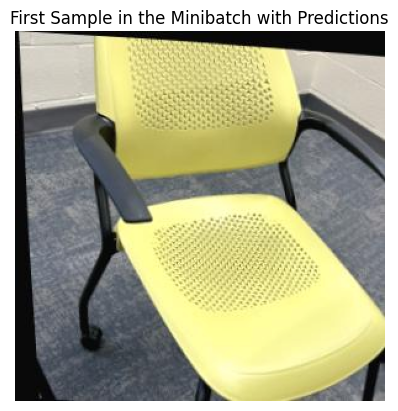

In [16]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import torchvision.transforms as T

# Set model to evaluation mode
model.eval()

# Get the first batch from the data loader
dataiter = iter(data_loader)
images, targets = next(dataiter)  # Assuming 'data_loader' is your DataLoader for training or validation
images = [image.to(device) for image in images]  # Move images to GPU if available

# Get predictions
with torch.no_grad():
    outputs = model(images)

# Set a confidence threshold for filtering predictions
confidence_threshold = 1.0

# Denormalize the first image in the minibatch for visualization
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

def denormalize(tensor, mean, std):
    mean = torch.tensor(mean).view(3, 1, 1)
    std = torch.tensor(std).view(3, 1, 1)
    return tensor * std + mean

# Visualize the first image in the minibatch and its predictions
image = images[0].cpu()  # Move the image back to CPU for visualization
image_denormalized = denormalize(image, mean, std)  # Denormalize the image

# Convert the tensor image to a format suitable for matplotlib
image_np = F.to_pil_image(image_denormalized).convert("RGB")
plt.imshow(image_np)

# Plot bounding boxes and labels for predictions above the confidence threshold
pred_boxes = outputs[0]['boxes'].cpu().numpy()  # Predicted bounding boxes
pred_labels = outputs[0]['labels'].cpu().numpy()  # Predicted labels
pred_scores = outputs[0]['scores'].cpu().numpy()  # Predicted scores

found_predictions = False
for i, box in enumerate(pred_boxes):
    score = pred_scores[i]
    if score >= confidence_threshold:  # Only show predictions above the confidence threshold
        found_predictions = True
        xmin, ymin, xmax, ymax = box
        plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                          linewidth=2, edgecolor='red', facecolor='none'))
        label = label_map.get(pred_labels[i], f"unknown ({pred_labels[i]})")
        plt.text(xmin, ymin, f"{label}: {score:.2f}", color='white', fontsize=12,
                 bbox=dict(facecolor='red', alpha=0.5, edgecolor='none'))

if not found_predictions:
    print("No predictions found with the given confidence threshold.")

plt.title("First Sample in the Minibatch with Predictions")
plt.axis('off')  # Hide axes for better visualization
plt.show()
